In [1]:
import pandas as pd
from smartsheet_dataframe import get_as_df
import os

In [2]:
# Storing Smartsheet information in variables
shitz_token = "wMvGniITjDFd7ClZPE44wtJGvZkM7Hg7mP7if" #Bily's personal token to access G-A smartsheet data. Anyone can obtain their own token
fhaid = 4523924143794052 # The ID number that references the FHA sheet
mssid = 3005704744265604 # The ID number that references the MSS sheet

In [3]:
# Creating the FHA and MSS dataframes
fha_df = get_as_df(type_='sheet',
                  token=shitz_token,
                  id_=fhaid)

mss_df = get_as_df(type_='sheet',
                  token=shitz_token,
                  id_=mssid)

In [4]:
war_df = mss_df.loc[mss_df['UniqueID'].str.contains("WAR")].copy()

In [5]:
war_df

,row_id,parent_id,IntakeID,FolderID,UniqueID,TicketID,Tract,CMP,Stand,Acres,...,Activity Implemented,Applied GA_ACRES,PstBA,PstTPA,PstGTA,RP Completed,Notes,Completed Date,Modified,Modified By
9,3397500974108548,,WAR241003,WAR241003,WAR241003TH01,WAR241003TH01,Racepond,4,12,29.92,...,,,,,,,,,2024-10-04T17:53:34Z,
10,8293160322043780,,WAR240924,WAR240924,WAR240924TH03,WAR240924TH03,13054,NP,23,31.29,...,,,,,,,,,2024-10-03T12:14:13Z,
11,4152124653932420,,WAR240924,WAR240924,WAR240924TH02,WAR240924TH02,13053,NP,44,146.55,...,,,,,,,,,2024-10-03T12:14:13Z,
12,8095894621622148,,WAR240924,WAR240924,WAR240924TH01,WAR240924TH01,13053,NP,23,110.81,...,,,,,,,,,2024-10-03T12:14:13Z,
13,4770703023771524,,WAR240924,WAR240924,WAR240924BI02,WAR240924BI02,13054,NP,23,11.07,...,,,,,,,,,2024-10-17T15:50:36Z,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,685639696508804,4415183137924996,WAR180518,WAR180518,WAR180518TH01,WAR180518TH01,4255.0,Elbert 11,1.0,150.92,...,1st Thin,,140.0,260.0,,,,,2024-01-04T21:31:30Z,mhamilton@green-assets.com
562,3289283231082372,,WAR180206,WAR180206,WAR180206TH04,WAR180206TH04,13193.0,NP,23.0,327.33,...,,,,,,,is a duplicate of WAR190311,,2024-01-04T21:31:30Z,mhamilton@green-assets.com
563,7792882858452868,3289283231082372,WAR180206,WAR180206,WAR180206TH03,WAR180206TH03,13150.0,NP,13.0,148.54,...,,,,,,,is a duplicate of WAR190311,,2024-01-04T21:31:30Z,mhamilton@green-assets.com
564,2163383324239748,3289283231082372,WAR180206,WAR180206,WAR180206TH02,WAR180206TH02,93A,NP,1.0,121.7,...,1st Thin,,,,,,Pulled off due to tropical depression. Too wet.,,2024-10-15T20:22:36Z,mhamilton@green-assets.com


In [6]:
war_df.columns

Index(['row_id', 'parent_id', 'IntakeID', 'FolderID', 'UniqueID', 'TicketID',
       'Tract', 'CMP', 'Stand', 'Acres', 'Age', 'GA_ACRES', 'County', 'State',
       'Plot Numbers', 'Status', 'Guidance', 'Expiration', 'GuidanceProvider',
       'Scheduled', 'Stand Type', 'Origin', 'PreBA', 'PreTPA', 'PreGTA',
       'PlnBA', 'PlnTPA', 'PlnGTA', 'Client GT', 'GA GT',
       'Current RP Expected GT', 'Future GT', 'Total GT', 'Timeframe',
       'Reporting Period', 'Activity Implemented', 'Applied GA_ACRES', 'PstBA',
       'PstTPA', 'PstGTA', 'RP Completed', 'Notes', 'Completed Date',
       'Modified', 'Modified By'],
      dtype='object')

In [7]:
client_df = war_df[['UniqueID',
                    'Tract',
                    'CMP',
                    'Stand',
                    'Acres',
                    'Age',
                    'County',
                    'State',
                    'Stand Type',
                    'Origin',
                    'Scheduled',
                    'PreBA',
                    'PreTPA',
                    'PreGTA',
                    'PlnBA',
                    'PlnTPA',
                    'PlnGTA',
                    'Client GT',
                    'Future GT',
                    'Reporting Period']].copy()
client_df

,UniqueID,Tract,CMP,Stand,Acres,Age,County,State,Stand Type,Origin,Scheduled,PreBA,PreTPA,PreGTA,PlnBA,PlnTPA,PlnGTA,Client GT,Future GT,Reporting Period
9,WAR241003TH01,Racepond,4,12,29.92,22.0,CHARLTON,GA,Slash Pine,Planted,,160.0,550.0,80.0,70.0,300.0,45.0,1047.2,0.0,9.0
10,WAR240924TH03,13054,NP,23,31.29,44.0,Heard,GA,Loblolly Pine,Planted,,100.0,165.0,110.0,60.0,75.0,85.0,782.0,0.0,9.0
11,WAR240924TH02,13053,NP,44,146.55,33.0,Heard,GA,Loblolly Pine,Planted,,120.0,330.0,115.0,70.0,185.0,85.0,4397.0,0.0,9.0
12,WAR240924TH01,13053,NP,23,110.81,24.0,Heard,GA,Loblolly Pine,Planted,,110.0,350.0,105.0,70.0,200.0,70.0,3878.0,0.0,9.0
13,WAR240924BI02,13054,NP,23,11.07,44.0,Heard,GA,Loblolly Pine,Planted,,100.0,165.0,110.0,0.0,0.0,0.0,1218.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,WAR180518TH01,4255.0,Elbert 11,1.0,150.92,NP,Crawford,GA,Loblolly Pine,Planted,2018.0,160.0,388.0,,Not Stated,200.0,,,,RP3
562,WAR180206TH04,13193.0,NP,23.0,327.33,16.0,Troup,GA,Loblolly Pine,Planted,2018.0,168.0,106.0,,85.0,55.0,,,,
563,WAR180206TH03,13150.0,NP,13.0,148.54,16.0,Heard,GA,Loblolly Pine,Planted,2018.0,168.0,106.0,,85.0,55.0,,,,
564,WAR180206TH02,93A,NP,1.0,121.7,16.0,Troup,GA,Loblolly Pine,Planted,2018.0,168.0,106.0,,85.0,55.0,,,,2.0


client_df is the data as given by the client during Harvest Activity Intake

I think the UniqueID will end up being a short value which will be a foreign key to a different table linking UniqueIDs to multiple tables. Unsure if I need that structure yet though because it will be unique on this table.

In [8]:
war_df.columns

Index(['row_id', 'parent_id', 'IntakeID', 'FolderID', 'UniqueID', 'TicketID',
       'Tract', 'CMP', 'Stand', 'Acres', 'Age', 'GA_ACRES', 'County', 'State',
       'Plot Numbers', 'Status', 'Guidance', 'Expiration', 'GuidanceProvider',
       'Scheduled', 'Stand Type', 'Origin', 'PreBA', 'PreTPA', 'PreGTA',
       'PlnBA', 'PlnTPA', 'PlnGTA', 'Client GT', 'GA GT',
       'Current RP Expected GT', 'Future GT', 'Total GT', 'Timeframe',
       'Reporting Period', 'Activity Implemented', 'Applied GA_ACRES', 'PstBA',
       'PstTPA', 'PstGTA', 'RP Completed', 'Notes', 'Completed Date',
       'Modified', 'Modified By'],
      dtype='object')

In [9]:
ga_intake_df = war_df[['IntakeID',
                       'FolderID',
                       'UniqueID',
                       'GA_ACRES',
                       'Guidance',
                       'Expiration',
                       'GuidanceProvider',
                       'GA GT', # this is going to be GA total isn't it?
                       'Total GT', # Does this need included? At the moment we do funny stuff with total gt and subtracting future gt
                       'Notes'
                       ]].copy()
ga_intake_df

,IntakeID,FolderID,UniqueID,GA_ACRES,Guidance,Expiration,GuidanceProvider,GA GT,Total GT,Notes
9,WAR241003,WAR241003,WAR241003TH01,30.06,,,GA,1052.07,1052.07,
10,WAR240924,WAR240924,WAR240924TH03,31.29,2024-10-02,,GA,782.16,782.25,
11,WAR240924,WAR240924,WAR240924TH02,148.67,2024-10-02,,GA,4460.18,4460.18,
12,WAR240924,WAR240924,WAR240924TH01,110.8,2024-10-02,,GA,3877.92,3878.35,
13,WAR240924,WAR240924,WAR240924BI02,11.08,2024-10-02,,ARB Guidance,1218.59,1218.59,
...,...,...,...,...,...,...,...,...,...,...
561,WAR180518,WAR180518,WAR180518TH01,140.7,2018-05-18,,,,,
562,WAR180206,WAR180206,WAR180206TH04,,2018-02-06,,,,,is a duplicate of WAR190311
563,WAR180206,WAR180206,WAR180206TH03,,2018-02-06,,,,,is a duplicate of WAR190311
564,WAR180206,WAR180206,WAR180206TH02,116.0,2018-02-06,,,,,Pulled off due to tropical depression. Too wet.


I am wondering about the Guidance, Expiration, Guidance Provider fields.

Part of me thinks this could either be a different table - OR I need to include Status in this table

In [10]:
status_df = war_df[['UniqueID', 'Status', 'Completed Date']].copy()
status_df

,UniqueID,Status,Completed Date
9,WAR241003TH01,PENDING,
10,WAR240924TH03,OPEN,
11,WAR240924TH02,OPEN,
12,WAR240924TH01,OPEN,
13,WAR240924BI02,OPEN,
...,...,...,...
561,WAR180518TH01,COMPLETED,
562,WAR180206TH04,DUPLICATE REQUEST,
563,WAR180206TH03,DUPLICATE REQUEST,
564,WAR180206TH02,COMPLETED,


In [11]:
ticket_df = war_df[['UniqueID', 'TicketID']].copy()
ticket_df

,UniqueID,TicketID
9,WAR241003TH01,WAR241003TH01
10,WAR240924TH03,WAR240924TH03
11,WAR240924TH02,WAR240924TH02
12,WAR240924TH01,WAR240924TH01
13,WAR240924BI02,WAR240924BI02
...,...,...
561,WAR180518TH01,WAR180518TH01
562,WAR180206TH04,WAR180206TH04
563,WAR180206TH03,WAR180206TH03
564,WAR180206TH02,WAR180206TH02


### I think this is a decent structure to get started

Next Steps:
cleaning data.

client_df:
 - RP needs to be an int
 - scheduled needs to be ...something... datetime?
 - age needs to be int
 - tract, comp, and stand should be str
 - all of the harvest data needs to be int (of float?) PlnBA, PlnTPA, PreBA, etc.
 - Do we want comp to be nullable? Probably

In [12]:
client_df['Reporting Period'] = client_df['Reporting Period'].fillna(0)

In [13]:
client_df.loc[client_df['Reporting Period'] == "", 'Reporting Period'] = 0

In [14]:
s = client_df.loc[pd.to_numeric(client_df['Reporting Period'], errors='coerce').isnull() & client_df['Reporting Period'].str.contains("RP"), 'Reporting Period'].apply(lambda x: x.strip()[-1])

In [15]:
client_df['trial'] = client_df.index.map(s)

In [16]:
client_df.loc[pd.to_numeric(client_df['Reporting Period'], errors='coerce').isnull() & client_df['Reporting Period'].str.contains("RP"), 'Reporting Period'] = client_df.loc[pd.to_numeric(client_df['Reporting Period'], errors='coerce').isnull() & client_df['Reporting Period'].str.contains("RP"), 'trial']

In [17]:
client_df['Reporting Period'] = pd.to_numeric(client_df['Reporting Period'], downcast='integer')

In [18]:
client_df['Age'] = pd.to_numeric(client_df['Age'], errors='coerce', downcast='integer').fillna(0).astype(int)


In [19]:
client_df.loc[pd.to_numeric(client_df['Future GT'], errors='coerce').isnull(), 'Future GT'] = 0

In [20]:
client_df['Tract'] = client_df['Tract'].astype(str)
client_df['Stand'] = client_df['Stand'].astype(str)

In [21]:
client_df['Tract'] = client_df['Tract'].apply(lambda x: x.split('.')[0])
client_df.head()

,UniqueID,Tract,CMP,Stand,Acres,Age,County,State,Stand Type,Origin,...,PreBA,PreTPA,PreGTA,PlnBA,PlnTPA,PlnGTA,Client GT,Future GT,Reporting Period,trial
9,WAR241003TH01,Racepond,4,12,29.92,22,CHARLTON,GA,Slash Pine,Planted,...,160.0,550.0,80.0,70.0,300.0,45.0,1047.2,0.0,9,NaN
10,WAR240924TH03,13054,NP,23,31.29,44,Heard,GA,Loblolly Pine,Planted,...,100.0,165.0,110.0,60.0,75.0,85.0,782.0,0.0,9,NaN
11,WAR240924TH02,13053,NP,44,146.55,33,Heard,GA,Loblolly Pine,Planted,...,120.0,330.0,115.0,70.0,185.0,85.0,4397.0,0.0,9,NaN
12,WAR240924TH01,13053,NP,23,110.81,24,Heard,GA,Loblolly Pine,Planted,...,110.0,350.0,105.0,70.0,200.0,70.0,3878.0,0.0,9,NaN
13,WAR240924BI02,13054,NP,23,11.07,44,Heard,GA,Loblolly Pine,Planted,...,100.0,165.0,110.0,0.0,0.0,0.0,1218.0,0.0,9,NaN


What to do about the PreBA, etc. fields... They need to all be int

In [22]:
client_df['PreBA'] = pd.to_numeric(client_df['PreBA'], errors='coerce', downcast='integer').fillna(-99).astype(int)

In [23]:
cols = ['PreBA', 'PreTPA', 'PreGTA', 'PlnBA', 'PlnTPA', 'PlnGTA']

for x in cols:
    client_df[x] = pd.to_numeric(client_df[x], errors='coerce', downcast='integer').fillna(-99).astype(int)

In [24]:
client_df

,UniqueID,Tract,CMP,Stand,Acres,Age,County,State,Stand Type,Origin,...,PreBA,PreTPA,PreGTA,PlnBA,PlnTPA,PlnGTA,Client GT,Future GT,Reporting Period,trial
9,WAR241003TH01,Racepond,4,12,29.92,22,CHARLTON,GA,Slash Pine,Planted,...,160,550,80,70,300,45,1047.2,0.0,9,NaN
10,WAR240924TH03,13054,NP,23,31.29,44,Heard,GA,Loblolly Pine,Planted,...,100,165,110,60,75,85,782.0,0.0,9,NaN
11,WAR240924TH02,13053,NP,44,146.55,33,Heard,GA,Loblolly Pine,Planted,...,120,330,115,70,185,85,4397.0,0.0,9,NaN
12,WAR240924TH01,13053,NP,23,110.81,24,Heard,GA,Loblolly Pine,Planted,...,110,350,105,70,200,70,3878.0,0.0,9,NaN
13,WAR240924BI02,13054,NP,23,11.07,44,Heard,GA,Loblolly Pine,Planted,...,100,165,110,0,0,0,1218.0,0.0,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,WAR180518TH01,4255,Elbert 11,1.0,150.92,0,Crawford,GA,Loblolly Pine,Planted,...,160,388,-99,-99,200,-99,,0,3,3
562,WAR180206TH04,13193,NP,23.0,327.33,16,Troup,GA,Loblolly Pine,Planted,...,168,106,-99,85,55,-99,,0,0,NaN
563,WAR180206TH03,13150,NP,13.0,148.54,16,Heard,GA,Loblolly Pine,Planted,...,168,106,-99,85,55,-99,,0,0,NaN
564,WAR180206TH02,93A,NP,1.0,121.7,16,Troup,GA,Loblolly Pine,Planted,...,168,106,-99,85,55,-99,,0,2,NaN


I am feeling ok about the client table now.
I want to try out the "RP Request" table next.

Purpose:
- Keeping a running tally of what is expected in each RP
  - We are given a total GT expected with intake
  - We are given harvest volume over time
  - Assessments are done on "Expected" versus an RP's allotment - which is why the RP expected is important
- Options:
  - Just subtract harvested off of total expected?
    - I don't think this will work because harvests often go over multiple periods and you don't want to overaccount expected volume
  - Keep track of expected volume by RP and update the new "current" rp with any carryover volume at each EORP assessment/analysis
    - Rob's rules:
      - Subtract off previous RP's harvested from the expected and if that is > 0 carry that over to the future/current RP
      - If an activity is over harvested do not carry over negative harvest value
- Other Issues:
  - We track volume at the TicketID scale, not the UniqueID
    - Expected volume will need to be GroupBy'd TicketID
    - TicketID will be set at the intake period and we recently decided to change the protocol to make sure that all harvests in a stand are in the same ticketid

Steps:
- Create TicketID table
- Groupby uniqueids by ticketid and get the current gt expected, next gt expected, and reporting period
- Get the RP8 harvest volumes by ticket id
- Carryover any RP8 volume for activities still in progress that is remaining after harvested volume is accounted for.
  - If they over harvest RP8 (harvest more than expected), do you maintain the same RP9 expected?

In [25]:
tickety_client_df = pd.merge(client_df, ticket_df, how='left', left_on='UniqueID', right_on='UniqueID')

In [26]:
tickety_client_df.head()

,UniqueID,Tract,CMP,Stand,Acres,Age,County,State,Stand Type,Origin,...,PreTPA,PreGTA,PlnBA,PlnTPA,PlnGTA,Client GT,Future GT,Reporting Period,trial,TicketID
0,WAR241003TH01,Racepond,4,12,29.92,22,CHARLTON,GA,Slash Pine,Planted,...,550,80,70,300,45,1047.2,0.0,9,NaN,WAR241003TH01
1,WAR240924TH03,13054,NP,23,31.29,44,Heard,GA,Loblolly Pine,Planted,...,165,110,60,75,85,782.0,0.0,9,NaN,WAR240924TH03
2,WAR240924TH02,13053,NP,44,146.55,33,Heard,GA,Loblolly Pine,Planted,...,330,115,70,185,85,4397.0,0.0,9,NaN,WAR240924TH02
3,WAR240924TH01,13053,NP,23,110.81,24,Heard,GA,Loblolly Pine,Planted,...,350,105,70,200,70,3878.0,0.0,9,NaN,WAR240924TH01
4,WAR240924BI02,13054,NP,23,11.07,44,Heard,GA,Loblolly Pine,Planted,...,165,110,0,0,0,1218.0,0.0,9,NaN,WAR240924BI02


Future GT is messy and apparently has some strings in it!

In [27]:
gt_df = tickety_client_df.groupby('TicketID').agg({'Client GT': "sum",
                                           'Future GT': "sum",
                                           "Reporting Period" : pd.Series.mode # this could cause problems in the future
                                           }).reset_index()

In [28]:
# Trying to build a gt_df off of the tickety_client_df
# There will be three fields : TicketID, Reporting Period, and GT
# Future GT will have a Reporting period of the row's reporting period + 1
# Not worrying about carryover volume yet
gt_df['GT'] = gt_df['Client GT']


In [29]:
interim_df = gt_df.loc[gt_df['Future GT'] > 0].copy()
interim_df['Reporting Period'] = interim_df['Reporting Period'] + 1
interim_df['GT'] = interim_df['Future GT']

In [30]:
gt_df = pd.concat([gt_df, interim_df])
gt_df

,TicketID,Client GT,Future GT,Reporting Period,GT
0,WAR180206TH01,,0,3,
1,WAR180206TH02,,0,2,
2,WAR180206TH03,,0,0,
3,WAR180206TH04,,0,0,
4,WAR180518TH01,,0,3,
...,...,...,...,...,...
179,WAR240529TT01,5874.0,5878.65,9,5878.65
180,WAR240606TH01,0.0,4676.350098,9,4676.350098
181,WAR240606TH02,0.0,6161.100098,9,6161.100098
182,WAR240606TH03,0.0,2810.100098,9,2810.100098


In [31]:
interim_df

,TicketID,Client GT,Future GT,Reporting Period,GT
55,WAR210218XXXX,,7876.2,6,7876.2
76,WAR220809CC01,,500.0,1,500.0
77,WAR220809CC02,,2912.0,1,2912.0
83,WAR220827TH02,,155.0,1,155.0
112,WAR230811CCXX,12000.000135,4443.00005,9,4443.00005
113,WAR230811TN01,185.48,89.52,9,89.52
114,WAR230811TN02,1203.51,580.85,9,580.85
115,WAR230811TN03,683.01,329.64,9,329.64
126,WAR231004CCXX,4000.000122,1779.0,9,1779.0
127,WAR231004TN01,1000.0,569.0,9,569.0


In [32]:
gt_df[gt_df['TicketID'] == 'WAR240101CCXX']

,TicketID,Client GT,Future GT,Reporting Period,GT
142,WAR240101CCXX,16270.52,4067.628052,8,16270.52
142,WAR240101CCXX,16270.52,4067.628052,9,4067.628052


In [33]:
gt_df = gt_df[['TicketID', 'Reporting Period', 'GT']].copy()
gt_df

,TicketID,Reporting Period,GT
0,WAR180206TH01,3,
1,WAR180206TH02,2,
2,WAR180206TH03,0,
3,WAR180206TH04,0,
4,WAR180518TH01,3,
...,...,...,...
179,WAR240529TT01,9,5878.65
180,WAR240606TH01,9,4676.350098
181,WAR240606TH02,9,6161.100098
182,WAR240606TH03,9,2810.100098


I think this is it. The weird parts are going to be starting this aggregated at the stand level - need to check if any current harvests are in the same stand and the checking/updating every eorp... But we do this at the moment anyway.

I guess.. let's grab the rp8 mill ticket update compiled and see what everything looks like with that process of updating RP9 based on carryover volume

In [34]:
rp8_compiled = pd.read_excel(r"P:\Mill Tickets\ARCHIVE\WAR_RP8\WAR_RP8_Compiled.xlsm", sheet_name='RP_Project')

In [35]:
rp8_compiled.columns

Index(['Date', 'Ticket', 'Mill', 'Product', 'Tons (U.S)', 'Cull Tons',
       'Accepted Tons', 'Compartment', 'Stand', 'County', 'Source', 'Notes',
       'Reporting Period', 'IntakeID', 'TicketID', 'Week'],
      dtype='object')

In [36]:
rp8_harvested = rp8_compiled.groupby('TicketID')['Tons (U.S)'].sum().reset_index()

In [37]:
rp8_accounting = pd.merge(gt_df, rp8_harvested, how='left', left_on='TicketID', right_on='TicketID')
rp8_accounting

,TicketID,Reporting Period,GT,Tons (U.S)
0,WAR180206TH01,3,,NaN
1,WAR180206TH02,2,,NaN
2,WAR180206TH03,0,,NaN
3,WAR180206TH04,0,,NaN
4,WAR180518TH01,3,,NaN
...,...,...,...,...
248,WAR240529TT01,9,5878.65,NaN
249,WAR240606TH01,9,4676.350098,NaN
250,WAR240606TH02,9,6161.100098,4757.8
251,WAR240606TH03,9,2810.100098,NaN


In [38]:
rp8_accounting = rp8_accounting[(rp8_accounting['Tons (U.S)'].notnull()) & (rp8_accounting['Reporting Period'] == 8)].copy()
rp8_accounting

,TicketID,Reporting Period,GT,Tons (U.S)
70,WAR220728XXXX,8,6177.0,12236.830
72,WAR220801CC01,8,3268.0,7330.200
74,WAR220801CC03,8,10324.0,14742.600
78,WAR220809CC03,8,17829.0,18096.610
81,WAR220809CC06,8,2718.0,3168.270
84,WAR220922TH01,8,147.0,7320.430
90,WAR230112TT01,8,6167.0,6728.630
91,WAR230113TD01,8,33490.0,7651.080
92,WAR230113TD02,8,12851.0,95.910
94,WAR230113TD04,8,12680.0,11999.750


Ok, looks like there are a couple harvests that were harvested early (scheduled for rp9 but some harvesting occurred in rp8)

In [39]:
rp8_accounting['Carryover'] = rp8_accounting['GT'] - rp8_accounting['Tons (U.S)']
rp8_accounting

,TicketID,Reporting Period,GT,Tons (U.S),Carryover
70,WAR220728XXXX,8,6177.0,12236.830,-6059.83
72,WAR220801CC01,8,3268.0,7330.200,-4062.2
74,WAR220801CC03,8,10324.0,14742.600,-4418.6
78,WAR220809CC03,8,17829.0,18096.610,-267.61
81,WAR220809CC06,8,2718.0,3168.270,-450.27
84,WAR220922TH01,8,147.0,7320.430,-7173.43
90,WAR230112TT01,8,6167.0,6728.630,-561.63
91,WAR230113TD01,8,33490.0,7651.080,25838.92
92,WAR230113TD02,8,12851.0,95.910,12755.09
94,WAR230113TD04,8,12680.0,11999.750,680.25


In [40]:
harvested_ids = rp8_accounting['TicketID'].unique().tolist()

In [41]:
# See which TicketIDs are for activities in RP 9 and have had harvesting
gt_df[(gt_df['TicketID'].isin(harvested_ids)) & (gt_df['Reporting Period'] == 9)]

,TicketID,Reporting Period,GT
112,WAR230811CCXX,9,4443.00005
126,WAR231004CCXX,9,1779.0
142,WAR240101CCXX,9,4067.628052
156,WAR240302TT02,9,5718.0
157,WAR240302TT03,9,2850.0
158,WAR240417TH01,9,2058.0
181,WAR240606TH02,9,6161.100098


Interesting. 
- WAR230811CCXX has been replaced by WAR240627BI02 - RP9 expected should be 23703.79
  - 230811CCXX is in my list because I did not filter out completed activities/withdrawn
- WAR231004CCXX harvested more than expected in RP8 - Rob did not take the excess volume out of RP9
- Rob did not account for carryover on WAR240101CCXX - think because of the ticketid / uniqueid difference or because we aren't transferring over harvesting from RP8 to RP9
- WAR240302 Rob did account for harvesting in RP8 with the RP9 volumes - because all volume was supposed to come from RP9, but they changed their minds.
- WAR240417TH01 is in post - so completed? I think Rob did not include it because it is Post
- WAR240606TH02 Rob did account for harvesting in RP8 with the RP9 volumes - because all volume was supposed to come from RP9, but they changed their minds.


Ok... Things to think about

- Only transfer remaining volume at the EORP if an activity is "In Process" - If it is "Post" or "Completed" there is no "Next Rp" anyway for that activity
- Any over harvesting in an RP will affect the estimated volume for the next RP
  - If RP8 is overharvested by 100 tons RP9 volume will go down by 100 tons at the EORP transfer/adjustment
    - This could lead to negative values for activities - but that is a communication point with the client that they harvested more than expected.
- Could write an sql query or python script that would take in a project ID (WAR) and a Reporting Period (8) and update the next RP's expected volume
- What happens to an activity that you don't have Post-Imp for and has overharvested
  - In RP8 Expected = 500 and harvested = 600. 
    - No Post-Imp so RP9 expected is create and would = -100
      - This doesn't seem right. Probably should just be 0 (I think this is how Rob handled it).

Rob has not previously accounted for over-harvesting to be more conservative in the future/next RP. So, the only volume that gets carried over is positive volume. 


If Status is In Process or Open (get list of IDs in this category)

- So, wherever there is RP8 and no RP9:
  - If RP8 Expected > RP8 Harvested:
    - RP9 Expected = Expected - Harvested

- If there is an RP9
  - RP9 = RP9 + (RP8 Expected - RP8 Harvested)

- If any results are < 0 just return 0

## Let's see what happens when we try to use the proposed new protocol for ticket id

This involves all activities that share a Tract_Comp_Stand to be a ticket id

Does this only count based on RP intake? or If activities are open/in process at the same time? or Only if they sent in the Pre-Imp at the same time?


In [42]:
war_inprog = war_df[war_df['Status'].isin(['OPEN', 'IN PROCESS', 'POST', 'PENDING'])].copy()
war_inprog['Tract'] = war_inprog['Tract'].astype(str).apply(lambda x: x.split('.')[0])
war_inprog['CMP'] = war_inprog['CMP'].astype(str).apply(lambda x: x.split('.')[0])
war_inprog['Stand'] = war_inprog['Stand'].astype(str).apply(lambda x: x.split('.')[0])
war_inprog['TCS'] = war_inprog['Tract'] + "_" + war_inprog['CMP'] + "_" + war_inprog['Stand']

In [43]:
war_inprog.head()

,row_id,parent_id,IntakeID,FolderID,UniqueID,TicketID,Tract,CMP,Stand,Acres,...,Applied GA_ACRES,PstBA,PstTPA,PstGTA,RP Completed,Notes,Completed Date,Modified,Modified By,TCS
9,3397500974108548,,WAR241003,WAR241003,WAR241003TH01,WAR241003TH01,Racepond,4,12,29.92,...,,,,,,,,2024-10-04T17:53:34Z,,Racepond_4_12
10,8293160322043780,,WAR240924,WAR240924,WAR240924TH03,WAR240924TH03,13054,NP,23,31.29,...,,,,,,,,2024-10-03T12:14:13Z,,13054_NP_23
11,4152124653932420,,WAR240924,WAR240924,WAR240924TH02,WAR240924TH02,13053,NP,44,146.55,...,,,,,,,,2024-10-03T12:14:13Z,,13053_NP_44
12,8095894621622148,,WAR240924,WAR240924,WAR240924TH01,WAR240924TH01,13053,NP,23,110.81,...,,,,,,,,2024-10-03T12:14:13Z,,13053_NP_23
13,4770703023771524,,WAR240924,WAR240924,WAR240924BI02,WAR240924BI02,13054,NP,23,11.07,...,,,,,,,,2024-10-17T15:50:36Z,,13054_NP_23


In [44]:
# After talking with Rob, we need to make sure that we separate out the GA and the ARB Guidance
grouped_activities = war_inprog.groupby(['TCS', 'GuidanceProvider'])['UniqueID'].apply(list).reset_index()

In [45]:
grouped_activities

,TCS,GuidanceProvider,UniqueID
0,13053_NP_23,ARB Guidance,[WAR240924BI01]
1,13053_NP_23,GA,[WAR240924TH01]
2,13053_NP_44,GA,[WAR240924TH02]
3,13054_NP_23,ARB Guidance,[WAR240924BI02]
4,13054_NP_23,GA,[WAR240924TH03]
...,...,...,...
58,WACO_4586_5,ARB Guidance,[WAR240702BI02]
59,WACO_4824_5,GA,[WAR240729TH01]
60,WACO_4825_4,GA,[WAR240417TH01]
61,WACO_4854_1,GA,[WAR230711TH01]


Okie Dokie.

So.. What I would like to do is group the unique id's based on the TCS.

Naming convention is WAR240924THXX if there are multiple thinnings (CCXX if multiple Clear Cuts, etc)

If there are mixed activities it goes to WAR240924XXXX

So, I think what I need to do is look through each UniqueID grouped by a TCS:
- If there is only 1 - keep it the same
- If there are more than 1 check the 9th and 10th characters (starting from 0) to see if they match across uniqueids
  - If they do then keep those and make the last two characters == "XX"
  - If they do no then make the last 4 characters == "XXXX"

Some problems to consider:
- What if there are multiple intake dates for a TCS?
  - Each have it's own unique TicketID?
    - How do we differentiate this to the client?
  - Merge them to the already existing one?
    - How do we search for that TicketID when we are going through activity intake?
    - How will Rob know to update his file (which hopefully isn't necessary anymore).

Ticket IDs need to be different depending on ARB and GA Guidance.

I think it will be best to keep the first intake id instance and append future activities to it.
- This will only be the case for "currently active" (IN PROCESS, OPEN, PENDING, POST) activities. 

In [46]:
trial_df = grouped_activities.copy()
trial_df

,TCS,GuidanceProvider,UniqueID
0,13053_NP_23,ARB Guidance,[WAR240924BI01]
1,13053_NP_23,GA,[WAR240924TH01]
2,13053_NP_44,GA,[WAR240924TH02]
3,13054_NP_23,ARB Guidance,[WAR240924BI02]
4,13054_NP_23,GA,[WAR240924TH03]
...,...,...,...
58,WACO_4586_5,ARB Guidance,[WAR240702BI02]
59,WACO_4824_5,GA,[WAR240729TH01]
60,WACO_4825_4,GA,[WAR240417TH01]
61,WACO_4854_1,GA,[WAR230711TH01]


In [47]:
def intake_breaker(lst):
    intake_lst = []
    activity_lst = []
    for ele in lst:
        intake_lst.append(ele[:9])
        activity_lst.append(ele[9:11])
        intake_st = set(intake_lst)
        activity_st = set(activity_lst)
        
    return intake_lst, activity_lst, intake_st, activity_st


def ticketid(lst):
    """This function creates a ticket id based off a list of unique ids

    Args:
        lst (list): a list of unique ids that have the same Tract_Cmp_Stand from MSS
    """
    if len(lst) == 0:
        return "ERROR, Where is your uniqueid?"
    elif len(lst) < 2:
        return lst[0]
    elif len(lst) > 1:
        # Check to see if there are multiple intakes
        temp_lst, activity_lst, temp_st, activity_st = intake_breaker(lst)
        temp_lst.sort()
        activity_lst.sort()
        if len(temp_st) > 1:
            return f"{temp_lst[0]}XXXX"
        # If there are not multiple intakes. Check to see if there are multiple activities in the lst (Intake portion should be same for all)
        elif len(activity_st) > 1:
           return f"{temp_lst[0]}XXXX"
       # If there is only a single activity type
        elif len(activity_st) == 1:
            return f"{temp_lst[0]}{activity_lst[0]}XX"
        else:
            return "Failed within len(lst) > 1"
        
    else:
        return "Failed at length of lst"    
                
            
        
        
            
        
        

In [48]:
trial_df['BBID'] = trial_df['UniqueID'].apply(lambda x: ticketid(x))

In [49]:
trial_df[trial_df['UniqueID'].apply(lambda x: len(x) > 1)]

,TCS,GuidanceProvider,UniqueID,BBID
9,13093_0020 0023_13,ARB Guidance,"[WAR240109BI07, WAR240109BI05, WAR240109BI04, ...",WAR240109BIXX
22,94C_1011 0002_2,GA,"[WAR231124TH03, WAR231124TH02, WAR231124TH01]",WAR231124THXX
23,94C_1011 0002_4,GA,"[WAR231124CC02, WAR231124CC01]",WAR231124CCXX
35,Elbert_11_6,GA,"[WAR240521CC03, WAR240521CC02, WAR240521CC01]",WAR240521CCXX
36,Elbert_1_4,GA,"[WAR240813TH07, WAR240813TH06, WAR240813TH05, ...",WAR231107XXXX
44,M-54B_118 003_5,GA,"[WAR231004CC03, WAR231004CC02, WAR231004CC01]",WAR231004CCXX
46,M81_NP_5,GA,"[WAR240220CC06, WAR240220CC05, WAR240220CC04, ...",WAR240220CCXX
48,Melson_NP_7,GA,"[WAR240426CC16, WAR240426CC15, WAR240426CC14, ...",WAR240426CCXX
53,River_0036 0132_4,GA,"[WAR240101CC07, WAR240101CC06, WAR240101CC05, ...",WAR240101CCXX
54,River_NP_4,ARB Guidance,"[WAR240722BI04, WAR240722BI03, WAR240722BI02, ...",WAR240722BIXX


### Well, the above works for now. It needs to be cleaned up and have some more checks/error proofing involved

BUT, an issue is that we have some activities that are grouped together even though they are in different stands because we weren't able to discern where the tickets came from


This is an issue for building up the database table - in the future an analyst will have to go in and make that edit to the TicketID table when the situation arises.

In [50]:
# Let's find all instances where multiple stands share a ticket_id from MSS

prev_combined = war_inprog.groupby('TicketID')['TCS'].apply(set).reset_index()
prev_combined.head()

,TicketID,TCS
0,WAR230113TD03,"{13180_NP_13, 18, 23, &27}"
1,WAR230113TD04,{33094A & 13180_NP_1 & 2}
2,WAR230203TTXX,"{13206_024 018_14, 13206_024 018_13}"
3,WAR230303TH01,{Clinch County_1_2}
4,WAR230318CC05,{BW55_0040 0009_CC1}


In [51]:
len(prev_combined.loc[prev_combined['TicketID'] == 'WAR230203TTXX', 'TCS'].values[0])

2

In [52]:
# Here are the Ticket IDs that also include multiple Stands
prev_combined.loc[prev_combined['TCS'].str.len()> 1]

,TicketID,TCS
2,WAR230203TTXX,"{13206_024 018_14, 13206_024 018_13}"
23,WAR231124XXXX,"{94C_1011 0002_2, 94C_1011 0002_4}"
25,WAR240109BIXX,"{13093_0020 0023_15, 13093_0020 0023_13}"


In [53]:
tcs = []
for val in prev_combined['TCS'].loc[prev_combined['TCS'].str.len()> 1].values:
    for item in val:
        print(item)
        tcs.append(item)

13206_024 018_14
13206_024 018_13
94C_1011 0002_2
94C_1011 0002_4
13093_0020 0023_15
13093_0020 0023_13


In [54]:
ticket_id_dict = {}
for i, row in prev_combined.loc[prev_combined['TCS'].str.len()> 1].iterrows():
    print(row['TicketID']) # ticket id
    value_list = []
    for value in row['TCS']:
        value_list.append(value)
    ticket_id_dict[row['TicketID']] = value_list

WAR230203TTXX
WAR231124XXXX
WAR240109BIXX


In [55]:
ticket_id_dict

{'WAR230203TTXX': ['13206_024 018_14', '13206_024 018_13'],
 'WAR231124XXXX': ['94C_1011 0002_2', '94C_1011 0002_4'],
 'WAR240109BIXX': ['13093_0020 0023_15', '13093_0020 0023_13']}

In [56]:
for k, v in ticket_id_dict.items():
    trial_df.loc[trial_df['TCS'].isin(v), 'otherid'] = k

In [57]:
trial_df[trial_df['otherid']!= "nan"]

,TCS,GuidanceProvider,UniqueID,BBID,otherid
9,13093_0020 0023_13,ARB Guidance,"[WAR240109BI07, WAR240109BI05, WAR240109BI04, ...",WAR240109BIXX,WAR240109BIXX
10,13093_0020 0023_15,ARB Guidance,[WAR240109BI06],WAR240109BI06,WAR240109BIXX
17,13206_024 018_13,GA,[WAR230203TT01],WAR230203TT01,WAR230203TTXX
18,13206_024 018_14,GA,[WAR230203TT02],WAR230203TT02,WAR230203TTXX
22,94C_1011 0002_2,GA,"[WAR231124TH03, WAR231124TH02, WAR231124TH01]",WAR231124THXX,WAR231124XXXX
23,94C_1011 0002_4,GA,"[WAR231124CC02, WAR231124CC01]",WAR231124CCXX,WAR231124XXXX


In [58]:
def final_id(row):
    if row['otherid'] != "nan":
        return row['otherid']
    else:
        return row['BBID']

In [59]:
trial_df['finalid'] = trial_df[['BBID', 'otherid']].apply(final_id, axis=1)

In [60]:
def break_list(x):
    trial_list = []
    for item in x:
        for iter in item:
            trial_list.append(iter)
            
    return trial_list
        

In [61]:
new_ticket_df = trial_df.groupby('finalid').agg({'TCS': lambda x: list(x),
                                 'UniqueID': lambda x: break_list(x)}).reset_index()

In [62]:
# See if we can do a filter with our ticketid to find the Client intake info
client_df.loc[client_df['UniqueID'].isin(new_ticket_df.loc[new_ticket_df['finalid'] == "WAR240521CCXX", 'UniqueID'].values[0])]

,UniqueID,Tract,CMP,Stand,Acres,Age,County,State,Stand Type,Origin,...,PreBA,PreTPA,PreGTA,PlnBA,PlnTPA,PlnGTA,Client GT,Future GT,Reporting Period,trial
336,WAR240521CC03,Elbert,11,6,30.01,41,Elbert,GA,Loblolly Pine,Planted,...,110,150,115,0,0,0,3451.15,0.0,9,NaN
337,WAR240521CC02,Elbert,11,6,34.5,41,Elbert,GA,Loblolly Pine,Planted,...,110,150,115,0,0,0,3967.5,0.0,9,NaN
338,WAR240521CC01,Elbert,11,6,20.6,41,Elbert,GA,Loblolly Pine,Planted,...,110,150,115,0,0,0,2369.0,0.0,9,NaN


In [63]:
for id in new_ticket_df['finalid'].unique().tolist():
    client_df.loc[client_df['UniqueID'].isin(new_ticket_df.loc[new_ticket_df['finalid'] == id, 'UniqueID'].values[0]), 'TicketID'] = id

In [64]:
len(client_df.loc[client_df['Reporting Period'].isin([8, 9]), 'TicketID'].unique())

61

In [65]:
client_df['Client GT'] = pd.to_numeric(client_df['Client GT'], errors="coerce")
client_df['Client GT'] = client_df['Client GT'].fillna(0)

In [66]:
# Looking for the current GT by the new ticketid (based off of Tract_Comp_Stand [TCS])
client_df.groupby(['TicketID', 'UniqueID', 'Reporting Period'])['Client GT'].sum()

TicketID       UniqueID       Reporting Period
WAR230113TD03  WAR230113TD03  8                    7322.00
WAR230113TD04  WAR230113TD04  8                   12680.00
WAR230203TTXX  WAR230203TT01  8                    1104.00
               WAR230203TT02  8                    3082.00
WAR230303TH01  WAR230303TH01  8                    4253.00
                                                    ...   
nan            WAR240529BI07  8                    1521.60
               WAR240529TT01  8                    5874.00
               WAR240719CC01  9                    3575.62
               WAR240719CC02  9                   42000.00
               WAR240719CC03  9                    3916.43
Name: Client GT, Length: 278, dtype: float64

#### I am actually feeling pretty good about this.... I just need to keep in mind that this ties back to UniqueID

But for harvest accounting / anything to do with timber volumes will be at the ticket id.

And acres are going to mostly involve working with the UniqueID


It's almost like ActivityBoundaryID (unique and distinct harvest boundaries) and HarvestVolumeID (Stand(ish) level harvest volume accounting).


### Ok, Where I am at and next steps 
So I have client intake, GA intake, ticketid.

I want to make sure I am all good on gt_expected (will be at ticketID level).

I want to build up an all time Harvested Volume table for all projects - should be easy at least as far back as update compileds have been around.

In [67]:
# Getting the RP8 expected by new ticket id
new_tcs_intake = client_df.groupby(['TicketID', 'UniqueID', 'Reporting Period'])['Client GT'].sum().reset_index()
new_tcs_intake.head()

,TicketID,UniqueID,Reporting Period,Client GT
0,WAR230113TD03,WAR230113TD03,8,7322.0
1,WAR230113TD04,WAR230113TD04,8,12680.0
2,WAR230203TTXX,WAR230203TT01,8,1104.0
3,WAR230203TTXX,WAR230203TT02,8,3082.0
4,WAR230303TH01,WAR230303TH01,8,4253.0


In [68]:
old_ticket_ids = dict(zip(war_df['UniqueID'], war_df['TicketID']))

In [69]:
new_tcs_intake['old_ticketids'] = new_tcs_intake['UniqueID'].map(old_ticket_ids)

In [70]:
new_tcs_intake['ticketCheck'] = new_tcs_intake['TicketID'] == new_tcs_intake['old_ticketids']

In [71]:
new_tcs_intake.loc[~new_tcs_intake['TicketID'].str.contains("WAR"), 'TicketID'] = new_tcs_intake['old_ticketids']

In [72]:
ticketid_table = new_tcs_intake[['TicketID', 'UniqueID']]

In [73]:
len(ticketid_table.groupby('TicketID'))

196

### Ok. I think the above is the TicketID table 

Not sure how best to implement it yet. Probably by just having a list of the unique TicketIDs and then having a foreign key in the ClientIntake and/or the GA intake

Let's try and figure out the expected gt table

In [74]:
rp8_new_tcs_intake = new_tcs_intake.loc[(new_tcs_intake['Reporting Period'] == 8) & new_tcs_intake['TicketID'].str.contains("WAR")]
rp8_new_tcs_intake.head()

,TicketID,UniqueID,Reporting Period,Client GT,old_ticketids,ticketCheck
0,WAR230113TD03,WAR230113TD03,8,7322.0,WAR230113TD03,True
1,WAR230113TD04,WAR230113TD04,8,12680.0,WAR230113TD04,True
2,WAR230203TTXX,WAR230203TT01,8,1104.0,WAR230203TTXX,True
3,WAR230203TTXX,WAR230203TT02,8,3082.0,WAR230203TTXX,True
4,WAR230303TH01,WAR230303TH01,8,4253.0,WAR230303TH01,True


In [75]:
# Time to see which ticketids in the compiled file are not in my new list due to the new naming convention
# Some of these are not going to be in there because there wasn't harvesting.
rp8_compiled_ticketids = rp8_compiled['TicketID'].unique().tolist()
new_tcs_ticketids = rp8_new_tcs_intake['TicketID'].unique().tolist()

potential_missing = [item for item in rp8_compiled_ticketids if item not in new_tcs_ticketids]
potential_missing

[]

In [76]:
status_df[(status_df['UniqueID'].isin(potential_missing)) & (status_df['Status'].isin(['IN PROCESS', 'POST']))]

,UniqueID,Status,Completed Date


Well, looks like the only ticket ids I am missing have been completed - and this new structure is to begin with RP9 so... Hurray for now?

In [77]:
# Let's see where The old ticketid doesn't have matching intake dates
war_df[war_df['UniqueID'].apply(lambda x: x[0:9]) != war_df['TicketID'].apply(lambda x: x[0:9])]

,row_id,parent_id,IntakeID,FolderID,UniqueID,TicketID,Tract,CMP,Stand,Acres,...,Activity Implemented,Applied GA_ACRES,PstBA,PstTPA,PstGTA,RP Completed,Notes,Completed Date,Modified,Modified By
314,3965711297908612,,WAR240627,WAR240627,WAR240627BI01,WAR230908XXXX,94B,NP,3,170.45,...,,,,,,,The ticketid for this activity is WAR230908XXX...,,2024-08-02T15:25:52Z,
340,8349738394816388,,WAR240517,WAR240517,WAR240517CC01,WAR231107CCXX,Elbert,2,4,30.74,...,,,,,,,,2024-08-01,2024-08-01T20:08:47Z,
420,5466346903867268,,WAR231006,WAR231006,WAR231006BI02,WAR230817CCXX,13091,Bugs,"10, 13, 14, 15, 23",12.82233,...,,,,,,,Bug Infestation. No Pre-Imp Data Given. No GA ...,,2024-08-02T14:22:06Z,bbrown@green-assets.com
506,2216159882372996,,WAR210128,WAR210128,WAR210128CC01,WAR201030XXXX,River Tract,NP,1.0,160.0,...,ClearCut,Update post submittal,0.0,0.0,0.0,,Unable to Differentiate Sales on River Tract,2023-07-11,2024-10-15T20:22:36Z,automation@smartsheet.com


In [78]:
rp8_new_tcs_intake[rp8_new_tcs_intake['TicketID'].isin(['WAR240627BI01', 'WAR240517CC01', 'WAR231006BI02', 'WAR210128CC01'])]

,TicketID,UniqueID,Reporting Period,Client GT,old_ticketids,ticketCheck
19,WAR231006BI02,WAR231006BI02,8,0.0,WAR230817CCXX,False


In [79]:
war_df[war_df['UniqueID'].apply(lambda x: x[0:9]) != war_df['TicketID'].apply(lambda x: x[0:9])]['Status']

314    IN PROCESS
340     COMPLETED
420    IN PROCESS
506     COMPLETED
Name: Status, dtype: object

In [80]:
# WAR240627BI01 is probably in RP9?
new_tcs_intake[new_tcs_intake['TicketID'].isin(['WAR240627BI01'])]

,TicketID,UniqueID,Reporting Period,Client GT,old_ticketids,ticketCheck
96,WAR240627BI01,WAR240627BI01,9,17897.0,WAR230908XXXX,False


In [81]:
[item for item in new_tcs_ticketids if item not in war_df['TicketID'].unique().tolist()]

['WAR231006BI02', 'WAR231107XXXX', 'WAR240220CCXX']

In [82]:
new_tcs_intake[new_tcs_intake['TicketID'].isin([item for item in new_tcs_ticketids if item not in war_df['TicketID'].unique().tolist()])]

,TicketID,UniqueID,Reporting Period,Client GT,old_ticketids,ticketCheck
19,WAR231006BI02,WAR231006BI02,8,0.00,WAR230817CCXX,False
24,WAR231107XXXX,WAR231107TH03,8,1815.00,WAR231107TH03,False
25,WAR231107XXXX,WAR240813TH01,9,426.94,WAR240813TH01,False
26,WAR231107XXXX,WAR240813TH02,9,1712.47,WAR240813TH02,False
27,WAR231107XXXX,WAR240813TH03,9,791.00,WAR240813TH03,False
28,WAR231107XXXX,WAR240813TH04,9,574.70,WAR240813TH04,False
29,WAR231107XXXX,WAR240813TH05,9,2210.90,WAR240813TH05,False
30,WAR231107XXXX,WAR240813TH06,9,3800.25,WAR240813TH06,False
31,WAR231107XXXX,WAR240813TH07,9,375.33,WAR240813TH07,False
52,WAR240220CCXX,WAR240220CC01,8,0.00,WAR240220CC01,False


In [83]:
# Manually fix this issue where we had to deal with overlaps and SPB management
new_tcs_intake.loc[new_tcs_intake['UniqueID'] == 'WAR231006BI02', 'TicketID'] = "WAR230817CCXX"

In [84]:
# alright. I got a little in the weeds. What I need to find is where ticket ids don't match the TCS ticketid

# let's try and go through the new ticketids and see what was harvested in rp8 - subtract that out of expected then add any remaining to rp9
rp8_group_intake = rp8_new_tcs_intake.groupby(['TicketID'])['Client GT'].sum().reset_index()

mergy = pd.merge(rp8_group_intake, rp8_harvested, left_on='TicketID', right_on="TicketID")

In [85]:
mergy

,TicketID,Client GT,Tons (U.S)
0,WAR220728XXXX,6177.000000,12236.830
1,WAR220801CC01,3268.000000,7330.200
2,WAR220801CC03,10324.000000,14742.600
3,WAR220809CC03,17829.000000,18096.610
4,WAR220809CC06,2718.000000,3168.270
5,WAR220922TH01,147.000000,7320.430
6,WAR230112TT01,6167.000000,6728.630
7,WAR230113TD01,33490.000000,7651.080
8,WAR230113TD02,12851.000000,95.910
9,WAR230113TD04,12680.000000,11999.750


In [86]:
mergy['diff'] = mergy['Client GT'] - mergy['Tons (U.S)']
mergy

,TicketID,Client GT,Tons (U.S),diff
0,WAR220728XXXX,6177.000000,12236.830,-6059.830000
1,WAR220801CC01,3268.000000,7330.200,-4062.200000
2,WAR220801CC03,10324.000000,14742.600,-4418.600000
3,WAR220809CC03,17829.000000,18096.610,-267.610000
4,WAR220809CC06,2718.000000,3168.270,-450.270000
5,WAR220922TH01,147.000000,7320.430,-7173.430000
6,WAR230112TT01,6167.000000,6728.630,-561.630000
7,WAR230113TD01,33490.000000,7651.080,25838.920000
8,WAR230113TD02,12851.000000,95.910,12755.090000
9,WAR230113TD04,12680.000000,11999.750,680.250000


In [87]:
mergy[mergy['diff'] >= 0]

,TicketID,Client GT,Tons (U.S),diff
7,WAR230113TD01,33490.000000,7651.080,25838.920000
8,WAR230113TD02,12851.000000,95.910,12755.090000
9,WAR230113TD04,12680.000000,11999.750,680.250000
15,WAR230318TT01,9257.620000,6705.950,2551.670000
17,WAR230330TDXX,15270.000000,10024.360,5245.640000
18,WAR230711TH01,15300.000000,15124.260,175.740000
19,WAR230712TH01,4450.000000,1811.500,2638.500000
20,WAR230712TH02,2828.000000,2347.730,480.270000
21,WAR230811CCXX,12000.000135,706.100,11293.900135
25,WAR230818TH02,3017.000000,2805.120,211.880000


In [88]:
new_tcs_intake[new_tcs_intake['TicketID'].isin(mergy[mergy['diff'] > 0]['TicketID'].unique().tolist())]

,TicketID,UniqueID,Reporting Period,Client GT,old_ticketids,ticketCheck
1,WAR230113TD04,WAR230113TD04,8,12680.000000,WAR230113TD04,True
10,WAR230711TH01,WAR230711TH01,8,15300.000000,WAR230711TH01,True
11,WAR230712TH01,WAR230712TH01,8,4450.000000,WAR230712TH01,True
12,WAR230712TH02,WAR230712TH02,8,2828.000000,WAR230712TH02,True
14,WAR230908TH04,WAR230908TH04,8,18043.550781,WAR230908TH04,True
44,WAR240109BIXX,WAR240109BI01,8,304.920000,WAR240109BIXX,True
45,WAR240109BIXX,WAR240109BI02,8,1431.600000,WAR240109BIXX,True
46,WAR240109BIXX,WAR240109BI03,8,575.630000,WAR240109BIXX,True
47,WAR240109BIXX,WAR240109BI04,8,1694.960000,WAR240109BIXX,True
48,WAR240109BIXX,WAR240109BI05,8,1302.200000,WAR240109BIXX,True


In [89]:
# Ok, time to remake that gt_df table. 
# Fields = TicketID, Reporting Period, GT Expected

gt_df = new_tcs_intake.groupby(['TicketID', 'Reporting Period'])['Client GT'].sum().reset_index()
gt_df = gt_df[gt_df['TicketID'].str.contains("WAR")]

In [90]:
gt_df

,TicketID,Reporting Period,Client GT
0,WAR180206TH01,3,0.0
1,WAR180206TH02,2,0.0
2,WAR180206TH03,0,0.0
3,WAR180206TH04,0,0.0
4,WAR180518TH01,3,0.0
...,...,...,...
191,WAR240924BI02,9,1218.0
192,WAR240924TH01,9,3878.0
193,WAR240924TH02,9,4397.0
194,WAR240924TH03,9,782.0


In [91]:
# Need to get the future GT

In [92]:
# Harvesting where expected GT is still remaining
mergy[mergy['diff'] >= 0]

,TicketID,Client GT,Tons (U.S),diff
7,WAR230113TD01,33490.000000,7651.080,25838.920000
8,WAR230113TD02,12851.000000,95.910,12755.090000
9,WAR230113TD04,12680.000000,11999.750,680.250000
15,WAR230318TT01,9257.620000,6705.950,2551.670000
17,WAR230330TDXX,15270.000000,10024.360,5245.640000
18,WAR230711TH01,15300.000000,15124.260,175.740000
19,WAR230712TH01,4450.000000,1811.500,2638.500000
20,WAR230712TH02,2828.000000,2347.730,480.270000
21,WAR230811CCXX,12000.000135,706.100,11293.900135
25,WAR230818TH02,3017.000000,2805.120,211.880000


In [93]:
# Can we get harvesting by old ticketID and translate that to the new ticketID?

# Get UniqueIDs that are moving on
# Get their TicketIDs
# See how different the old TicketIDs are to the new for those activities
# Transfer Harvested volume from old to new ticketid



In [94]:
harvest_activities = war_df[(war_df['Reporting Period'] == 8) & (war_df['Status'].isin(['OPEN', 'IN PROCESS', "POST"]))]['UniqueID'].unique().tolist()
harvest_old_ticketid = war_df[(war_df['Reporting Period'] == 8) & (war_df['Status'].isin(['OPEN', 'IN PROCESS', "POST"]))]['TicketID'].unique().tolist()

In [95]:
rp8_compiled[rp8_compiled['TicketID'].isin(harvest_old_ticketid)]['Tons (U.S)'].sum()

146413.93

In [96]:
new_ticketids = new_tcs_intake[new_tcs_intake['UniqueID'].isin(harvest_activities)]['TicketID'].unique().tolist()

In [97]:
[item for item in harvest_old_ticketid if item not in new_ticketids]

['WAR240220CC06',
 'WAR240220CC05',
 'WAR240220CC04',
 'WAR240220CC03',
 'WAR240220CC02',
 'WAR240220CC01',
 'WAR231107TH03']

In [98]:
# So. These ticketids have had harvesting and will be getting a new ticketid under the new naming convention
# Let's see if we can transfer the harvested volume from ticket id to ticket id through the unique ids

grouped_harvested = rp8_compiled.groupby('TicketID')['Tons (U.S)'].sum().reset_index()
harvested_activities_old = war_df[(war_df['Reporting Period'] == 8) & (war_df['Status'].isin(['OPEN', 'IN PROCESS', "POST"]))].copy()
harvested_activities_old = harvested_activities_old[['UniqueID', 'TicketID']]

harvested_activities_old = pd.merge(harvested_activities_old, grouped_harvested, left_on='TicketID', right_on='TicketID')
sum(harvested_activities_old.groupby('TicketID')['Tons (U.S)'].first())

146413.92999999996

In [99]:
harvested_new = new_tcs_intake[new_tcs_intake['UniqueID'].isin(harvest_activities)].copy()
harvested_new = harvested_new[['UniqueID', 'TicketID']].copy()

In [100]:
harvested_merged = pd.merge(harvested_new, harvested_activities_old, left_on='UniqueID', right_on='UniqueID')

In [101]:
sum(harvested_merged.groupby('TicketID_x')['Tons (U.S)'].first())

146413.92999999996

In [102]:
harvested_merged.groupby('TicketID_x')['Tons (U.S)'].first()

TicketID_x
WAR230113TD04    11999.75
WAR230203TTXX     5966.10
WAR230318CC05     5363.04
WAR230318TH02     4765.70
WAR230318TT06      771.60
WAR230711TH01    15124.26
WAR230712TH01     1811.50
WAR230712TH02     2347.73
WAR230817CCXX    17239.67
WAR230818TH01     4317.66
WAR230908TH04    13091.68
WAR231004CCXX     6566.88
WAR231013TT01     9603.99
WAR231124XXXX     7350.28
WAR240101CCXX    18017.10
WAR240109BIXX     8699.93
WAR240302TT02     4235.86
WAR240302TT03     2510.22
WAR240417TH01     1873.18
WAR240606TH02     4757.80
Name: Tons (U.S), dtype: float64

In [103]:
harvested_merged

,UniqueID,TicketID_x,TicketID_y,Tons (U.S)
0,WAR230113TD04,WAR230113TD04,WAR230113TD04,11999.75
1,WAR230203TT01,WAR230203TTXX,WAR230203TTXX,5966.10
2,WAR230203TT02,WAR230203TTXX,WAR230203TTXX,5966.10
3,WAR230318CC05,WAR230318CC05,WAR230318CC05,5363.04
4,WAR230318TH02,WAR230318TH02,WAR230318TH02,4765.70
5,WAR230318TT06,WAR230318TT06,WAR230318TT06,771.60
6,WAR230711TH01,WAR230711TH01,WAR230711TH01,15124.26
7,WAR230712TH01,WAR230712TH01,WAR230712TH01,1811.50
8,WAR230712TH02,WAR230712TH02,WAR230712TH02,2347.73
9,WAR230818TH01,WAR230818TH01,WAR230818TH01,4317.66


## Hold up

Maybe what needs to happen first is collecting and getting all of the harvest info for WAR

In [14]:
import glob
mill_loc = r"P:\Mill Tickets"
file_pattern = "WAR_RP*_Compiled.xlsm"
big_df = pd.DataFrame()

mill_name = []
for root, dirs, files in os.walk(mill_loc):
    for file in files:
        if "WAR_RP" in file and file.endswith("Compiled.xlsm"):
            if "$" in file:
                pass
            else:
                print(root)
                print(file)
                df = pd.read_excel(os.path.join(root, file), sheet_name='RP_Project')
                big_df = pd.concat([big_df, df])

P:\Mill Tickets\ARCHIVE\WAR_RP6
WAR_RP6_Compiled.xlsm
P:\Mill Tickets\ARCHIVE\WAR_RP7
WAR_RP7_Compiled.xlsm
P:\Mill Tickets\ARCHIVE\WAR_RP8
WAR_RP8_Compiled.xlsm
P:\Mill Tickets\Retroactive_Ticket_imageing\WAR\WAR_RP2
WAR_RP2_Compiled.xlsm


c:\Users\bbrown\Anaconda3\envs\postgres_python\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


P:\Mill Tickets\Retroactive_Ticket_imageing\WAR\WAR_RP3
WAR_RP3_Compiled.xlsm


c:\Users\bbrown\Anaconda3\envs\postgres_python\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


P:\Mill Tickets\Retroactive_Ticket_imageing\WAR\WAR_RP4
WAR_RP4_Compiled.xlsm


c:\Users\bbrown\Anaconda3\envs\postgres_python\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


P:\Mill Tickets\Retroactive_Ticket_imageing\WAR\WAR_RP5
WAR_RP5_Compiled.xlsm


c:\Users\bbrown\Anaconda3\envs\postgres_python\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


P:\Mill Tickets\WAR_RP9
WAR_RP9_Compiled.xlsm


In [15]:
big_df.head()

,Date,Ticket,Mill,Product,Tons (U.S),Cull Tons,Accepted Tons,Compartment,Stand,County,...,TicketID,Week,Unnamed: 16,Stand,TonsUS,CullTons,AcceptedTons,ReportingPeriod,DBLINK,MISSING FILE
0,2021-08-02 00:00:00,160048,Norbord Inc - Huguley,PPW,26.31,0.0,26.31,M-82,1,Meriwether,...,WAR201030TH04,Week01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-03 00:00:00,160157,Norbord Inc - Huguley,PPW,25.79,0.0,25.79,M-82,1,Meriwether,...,WAR201030TH04,Week01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-03 00:00:00,160120,Norbord Inc - Huguley,PPW,25.32,0.0,25.32,M-82,1,Meriwether,...,WAR201030TH04,Week01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-03 00:00:00,160155,Norbord Inc - Huguley,PPW,25.31,0.0,25.31,M-82,1,Meriwether,...,WAR201030TH04,Week01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-03 00:00:00,160082,Norbord Inc - Huguley,PPW,27.17,0.0,27.17,M-82,1,Meriwether,...,WAR201030TH04,Week01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
big_df.loc[big_df['Tons (U.S)'].isnull(), 'Tons (U.S)'] = big_df.loc[big_df['Tons (U.S)'].isnull(), 'TonsUS']
big_df['Cull Tons'].fillna(big_df['CullTons'], inplace=True)
big_df['Accepted Tons'].fillna(big_df['AcceptedTons'], inplace=True)
big_df['Reporting Period'].fillna(big_df['ReportingPeriod'],inplace=True)



In [40]:
big_df['Reporting Period'].value_counts()

Reporting Period
8    11243
7     7150
6     6796
5     5028
4     2740
9     1575
3     1348
2      184
Name: count, dtype: int64

In [35]:
def rep_fix(x):
    if "RP" in str(x):
        return x[-1]
    else:
        return x

In [55]:
big_df['Reporting Period'] = big_df['Reporting Period'].apply(lambda x: rep_fix(x))
big_df['Reporting Period'] = pd.to_numeric(big_df['Reporting Period'])

big_df['Date'] = pd.to_datetime(big_df['Date'])

In [56]:
big_df.columns

Index(['Date', 'Ticket', 'Mill', 'Product', 'Tons (U.S)', 'Cull Tons',
       'Accepted Tons', 'Compartment', 'Stand ', 'County', 'Source', 'Notes',
       'Reporting Period', 'IntakeID', 'UniqueID', 'TicketID', 'Week',
       'Unnamed: 16', 'Stand', 'TonsUS', 'CullTons', 'AcceptedTons',
       'ReportingPeriod', 'DBLINK', 'MISSING FILE'],
      dtype='object')

In [68]:
mill_df = big_df[['Date',
                  'Ticket',
                  'Mill',
                  'Product',
                  'Tons (U.S)',
                  'Cull Tons',
                  'Accepted Tons',
                  'Source',
                  'Notes',
                  'Reporting Period',
                  'TicketID',
                  'Week']].copy()

In [69]:
len(mill_df)

36064

In [70]:
mill_df = mill_df.drop_duplicates()

In [71]:
len(mill_df)

36060

In [72]:
mill_df['Tons (U.S)'].sum()

1085246.487

In [76]:
mill_df_sorted = mill_df.sort_values(by='Date', ascending=True)
mill_df_sorted['CumSumTons'] = mill_df_sorted['Tons (U.S)'].cumsum()

Text(0.5, 1.0, 'HMWCFI Cumulative Harvested Tons')

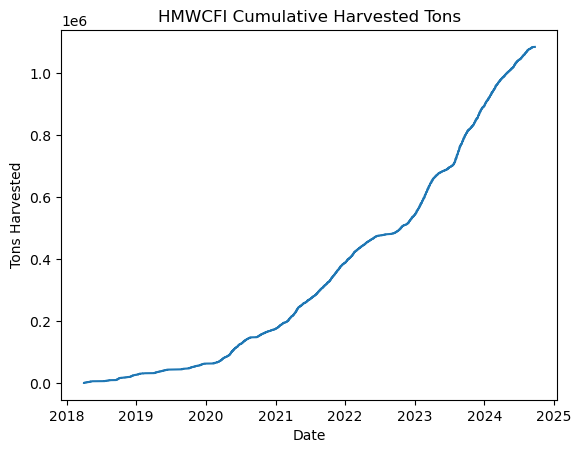

In [77]:
import matplotlib.pyplot as plt

plt.plot(mill_df_sorted['Date'], mill_df_sorted['CumSumTons'])
plt.xlabel('Date')
plt.ylabel('Tons Harvested')
plt.title("HMWCFI Cumulative Harvested Tons")

In [85]:
from scipy.optimize import curve_fit
import numpy as np

def linear_func(x, a, b):
    return a * x + b

params, _ = curve_fit(linear_func, mill_df_sorted.index, mill_df_sorted['CumSumTons'])

fitted_cumsum = linear_func(mill_df_sorted.index, *params)

derivative_fun = np.gradient(fitted_cumsum)

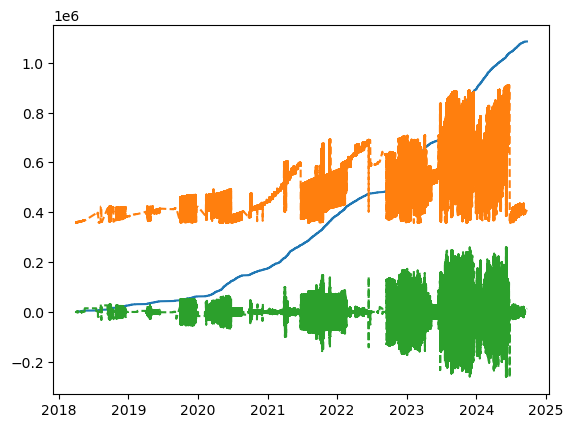

In [94]:
plt.plot(mill_df_sorted['Date'], mill_df_sorted['CumSumTons'])
plt.plot(mill_df_sorted['Date'], fitted_cumsum, linestyle='--')
plt.plot(mill_df_sorted['Date'], derivative_fun, linestyle='--')

In [81]:
mill_df_sorted[:25]

,Date,Ticket,Mill,Product,Tons (U.S),Cull Tons,Accepted Tons,Source,Notes,Reporting Period,TicketID,Week,CumSumTons,derivative
0,2018-04-02,559174,International Paper 70980 - Rome Mill Fiber,Pulpwood,29.13,0.0,29.13,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,29.13,NaN
18,2018-04-02,559124,International Paper 70980 - Rome Mill Fiber,Pulpwood,30.65,0.0,30.65,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,59.78,30.65
14,2018-04-02,559293,International Paper 70980 - Rome Mill Fiber,Pulpwood,31.40,0.0,31.40,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,91.18,31.40
11,2018-04-03,559579,International Paper 70980 - Rome Mill Fiber,Pulpwood,30.90,0.0,30.90,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,122.08,30.90
20,2018-04-03,559733,International Paper 70980 - Rome Mill Fiber,Pulpwood,30.10,0.0,30.10,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,152.18,30.10
1,2018-04-03,559404,International Paper 70980 - Rome Mill Fiber,Pulpwood,28.36,0.0,28.36,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,180.54,28.36
21,2018-04-03,9197,"Valley Wood, Inc. Post Mill",Post,29.08,0.0,29.08,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,209.62,29.08
6,2018-04-03,559420,International Paper 70980 - Rome Mill Fiber,Pulpwood,29.39,0.0,29.39,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,239.01,29.39
9,2018-04-03,559332,International Paper 70980 - Rome Mill Fiber,Pulpwood,30.48,0.0,30.48,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,269.49,30.48
5,2018-04-03,559465,International Paper 70980 - Rome Mill Fiber,Pulpwood,31.25,0.0,31.25,HMWCFI_RP2_Harvest_Grp1.pdf,NaN,2,WAR180206TH02,1,300.74,31.25
